<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sources" data-toc-modified-id="Sources-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sources</a></span></li><li><span><a href="#Local-coordinates-of-the-sun" data-toc-modified-id="Local-coordinates-of-the-sun-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Local coordinates of the sun</a></span></li><li><span><a href="#Local-coordinates-of-Planets,-Sun-and-Moon" data-toc-modified-id="Local-coordinates-of-Planets,-Sun-and-Moon-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Local coordinates of Planets, Sun and Moon</a></span></li></ul></div>

# Solar system objects and polar plots

In this seminar, we will try to obtain the coordinates for several solar system objects and plot them in polar coordinates.

## Sources
- pyephem: https://pypi.org/project/ephem/
- https://stackoverflow.com/questions/21812362/look-up-planet-or-moon-by-name-in-pyephem
- Basemap: http://psysmon.mertl-research.at/sourcedoc/_modules/mpl_toolkits/basemap.html
- https://matplotlib.org/basemap/
- https://matplotlib.org/basemap/users/examples.html

In [1]:
import numpy as np
from matplotlib import pylab as plt

from mpl_toolkits.basemap import Basemap

import ephem

First, we set the observer coordinates and time. The simplest way to set the time in ephem, is to use Greenwich mean time.

In [2]:
NHAO     = ephem.Observer()
NHAO.lon = "134.3356"
NHAO.lat = "35.025"
NHAO.date= "2019/06/26 7:00"

## Local coordinates of the sun 

In [3]:
SUN = ephem.Sun()
SUN.compute(NHAO)

print("Declination:     ", float(SUN.dec)/np.pi*180.)     ## (赤緯)
print("Right ascension: ", float(SUN.ra)/np.pi*180.) ## (赤経)

print("Elevation        ", float(SUN.alt)/np.pi*180.)
print("Azimuth:         ", float(SUN.az)/np.pi*180.)


('Declination:     ', 23.361049160609934)
('Right ascension: ', 94.80873881042564)
('Elevation        ', 38.24565450277015)
('Azimuth:         ', 273.6895322691028)


## Local coordinates of Planets, Sun and Moon

In [4]:
ephem._libastro.builtin_planets()

[(0, 'Planet', 'Mercury'),
 (1, 'Planet', 'Venus'),
 (2, 'Planet', 'Mars'),
 (3, 'Planet', 'Jupiter'),
 (4, 'Planet', 'Saturn'),
 (5, 'Planet', 'Uranus'),
 (6, 'Planet', 'Neptune'),
 (7, 'Planet', 'Pluto'),
 (8, 'Planet', 'Sun'),
 (9, 'Planet', 'Moon'),
 (10, 'PlanetMoon', 'Phobos'),
 (11, 'PlanetMoon', 'Deimos'),
 (12, 'PlanetMoon', 'Io'),
 (13, 'PlanetMoon', 'Europa'),
 (14, 'PlanetMoon', 'Ganymede'),
 (15, 'PlanetMoon', 'Callisto'),
 (16, 'PlanetMoon', 'Mimas'),
 (17, 'PlanetMoon', 'Enceladus'),
 (18, 'PlanetMoon', 'Tethys'),
 (19, 'PlanetMoon', 'Dione'),
 (20, 'PlanetMoon', 'Rhea'),
 (21, 'PlanetMoon', 'Titan'),
 (22, 'PlanetMoon', 'Hyperion'),
 (23, 'PlanetMoon', 'Iapetus'),
 (24, 'PlanetMoon', 'Ariel'),
 (25, 'PlanetMoon', 'Umbriel'),
 (26, 'PlanetMoon', 'Titania'),
 (27, 'PlanetMoon', 'Oberon'),
 (28, 'PlanetMoon', 'Miranda')]

In [5]:
NAMES  = ephem._libastro.builtin_planets()[:10]
getattr(ephem, NAMES[0][2])

ephem.Mercury

In [6]:
TEN_CO = []
for i in NAMES:
    OBJ = getattr(ephem, i[2])()
    OBJ.compute(NHAO)
    
    ALT = float(OBJ.alt)/np.pi*180.
    AZ  = float(OBJ.az)/np.pi*180.
    
    TEN_CO.append([AZ,ALT])

Let`s print the computed horizontal coordinates (Az, Alt). 

In [7]:
TEN_CO

[[250.86760262928578, 58.44127053878516],
 [280.51163449513825, 26.147900501438507],
 [256.23689629810286, 56.993239698891195],
 [101.95890559017263, -22.894633588437244],
 [82.94807807325012, -49.668971719792644],
 [298.66753406383947, -15.564129646626476],
 [328.8854657445131, -56.65896682581618],
 [79.7982133940937, -53.38434874146946],
 [273.6895322691028, 38.24565450277015],
 [303.4361535762889, -37.83429952981697]]

In [8]:
NHAO.date.datetime()

datetime.datetime(2019, 6, 26, 6, 59, 59, 999999)

Let's plot the coordinates onto a cartesian map.

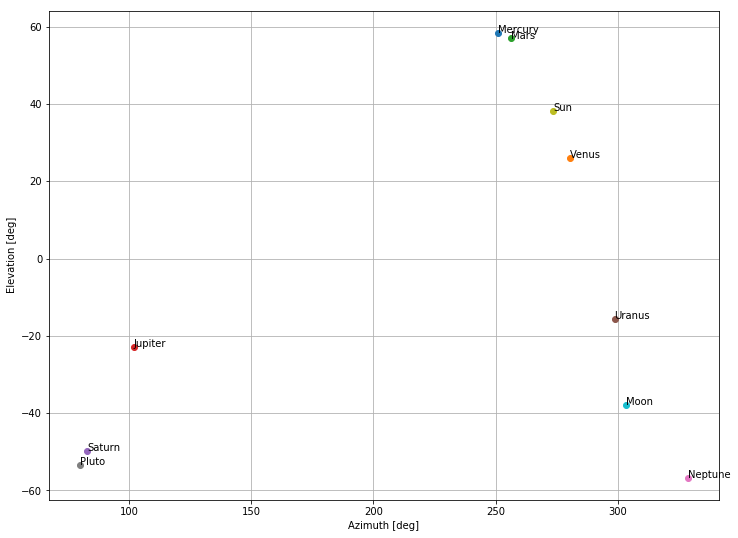

In [9]:
plt.figure(figsize = (12,9))

n = 0
for i in TEN_CO:
    plt.plot(i[0],i[1], "o")
    plt.text(i[0],i[1], NAMES[n][2])
    n+=1 ### n = n+1

plt.xlabel("Azimuth [deg]")
plt.ylabel("Elevation [deg]")
plt.grid(True)
plt.show()

Following, we will plot the data points onto a 2D projection of a 3D sphere. Therefore, we can define a Basemap object, which requires the projection. 

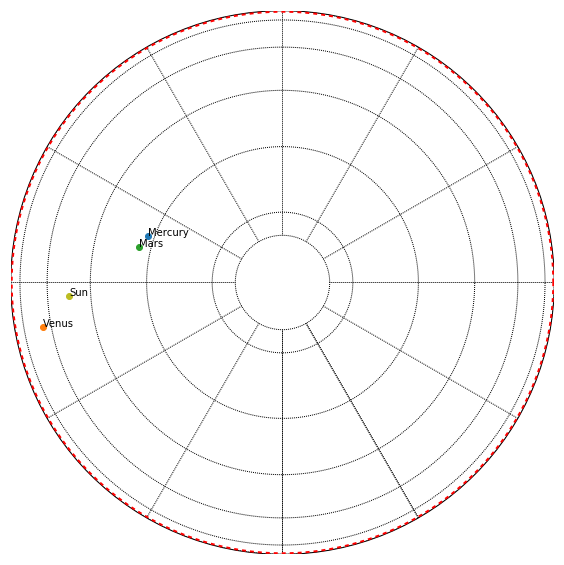

In [10]:
def sphere_plot(COORDINATES, NAMELIST, lon_0 = 0, lat_0 = 90):

    plt.figure(figsize = (10,10))
    SPHERE = Basemap(projection='ortho',
                     lon_0=lon_0,
                     lat_0=lat_0)
    ### create meridians and geodesics 
    SPHERE.drawmeridians(np.arange(0.,420.,30.))
    SPHERE.drawparallels(np.arange(-90.,120.,15.))
    horizon = SPHERE.drawparallels([0], color = "r", linewidth=4)
    n = 0
    for i in COORDINATES:
        j0,j1 = SPHERE(i[0],i[1])
        plt.plot(j0,j1, "o")
        plt.text(j0,j1, NAMELIST[n][2])
        n+=1 ### n = n+1
    plt.show()
    
sphere_plot(TEN_CO,NAMES)

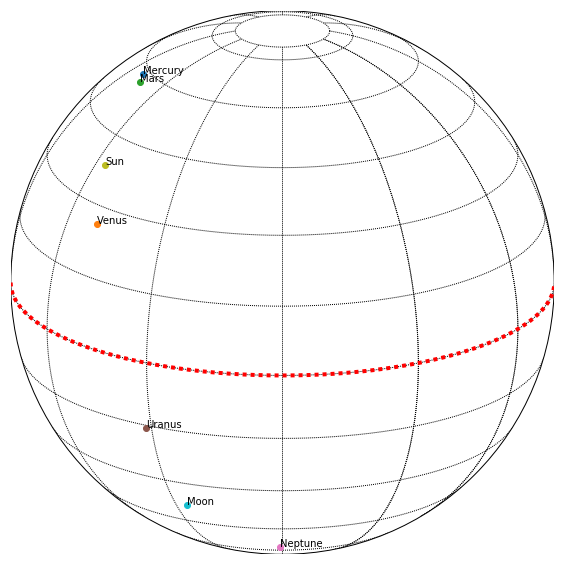

In [11]:
sphere_plot(TEN_CO,NAMES, -30,20)